# Regression

In [1]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Simple linear regression: $\delta^{18}\text{O}$ and salinity

Let's take a look at some data linking sea surface salinity and $\delta^{18}O$ in a coral from the tropical Pacific. The data comes from one of Prof. Jess Conroy's studies
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016PA003073

We are looking at the relation between $\delta^{18}\text{O}$ and salinity at Palau.

In [13]:
# read data and take a cursory look
df=pd.read_csv('/data/keeling/a/cristi/SIMLES/data/d18O_SSS_conroy2017.csv')
df

,SSS,d18O,dD
0,33.38,-0.04,0.33
1,33.42,-0.01,0.30
2,33.51,0.00,0.07
3,33.34,-0.04,0.17
4,33.29,-0.04,0.23
...,...,...,...
77,33.22,0.10,-0.32
78,33.42,0.10,0.58
79,33.45,0.14,0.58
80,33.60,0.14,0.75


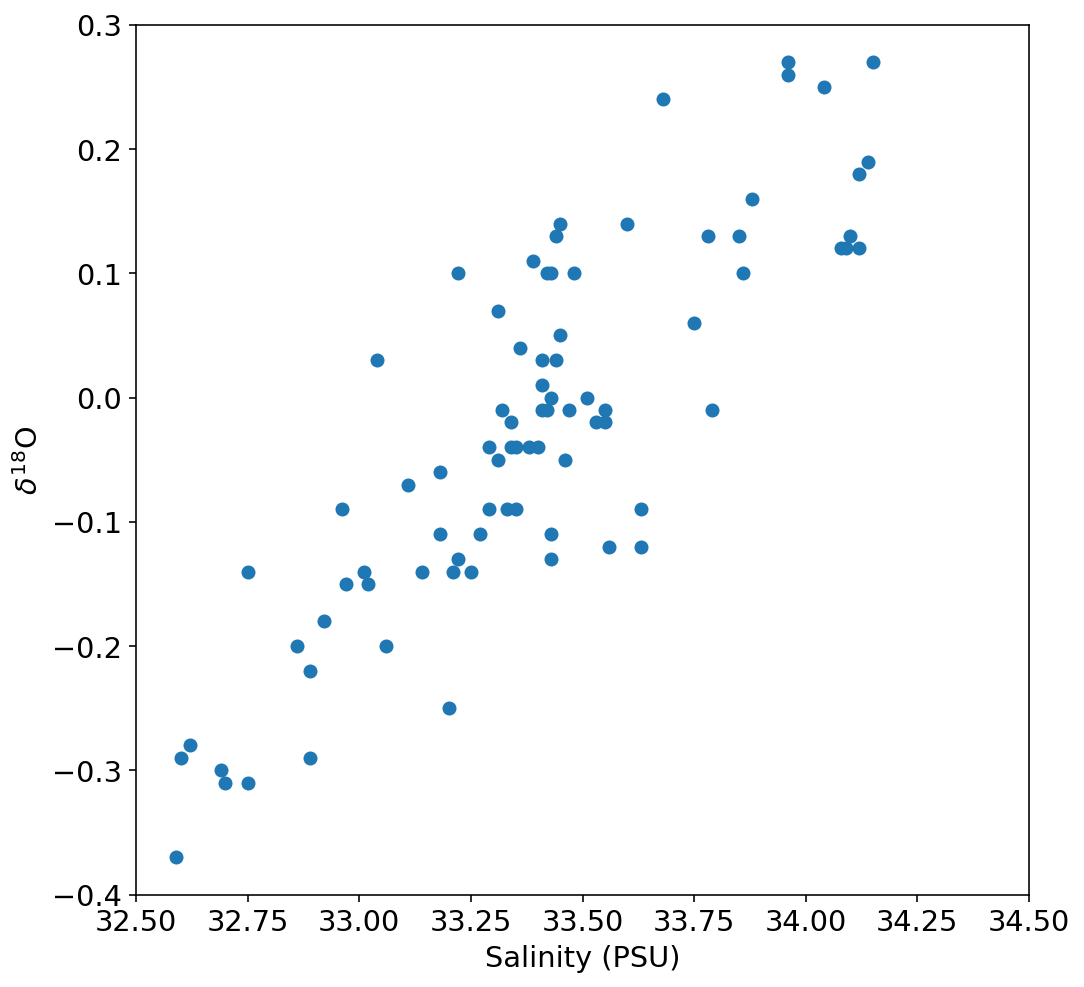

In [7]:
# plot data
x=df['SSS'].values
y=df[['d18O']].values

plt.rcParams['figure.figsize'] = 8,8
fig, ax = plt.subplots(1, 1)
ax.plot(df['SSS'],df['d18O'],'o')
ax.set_xlim(left=32.5,right=34.5)
ax.set_ylim(bottom=-0.4,top=0.3)
ax.set_xlabel('Salinity (PSU)');
ax.set_ylabel('$\delta^{18}$O');

## Regression sklearn
A simple, general way to do regression is using <code>LinearRegression</code> model from <code>sklearn</code>:

slope=[[0.32530734]]
intercept=[-10.88774667]


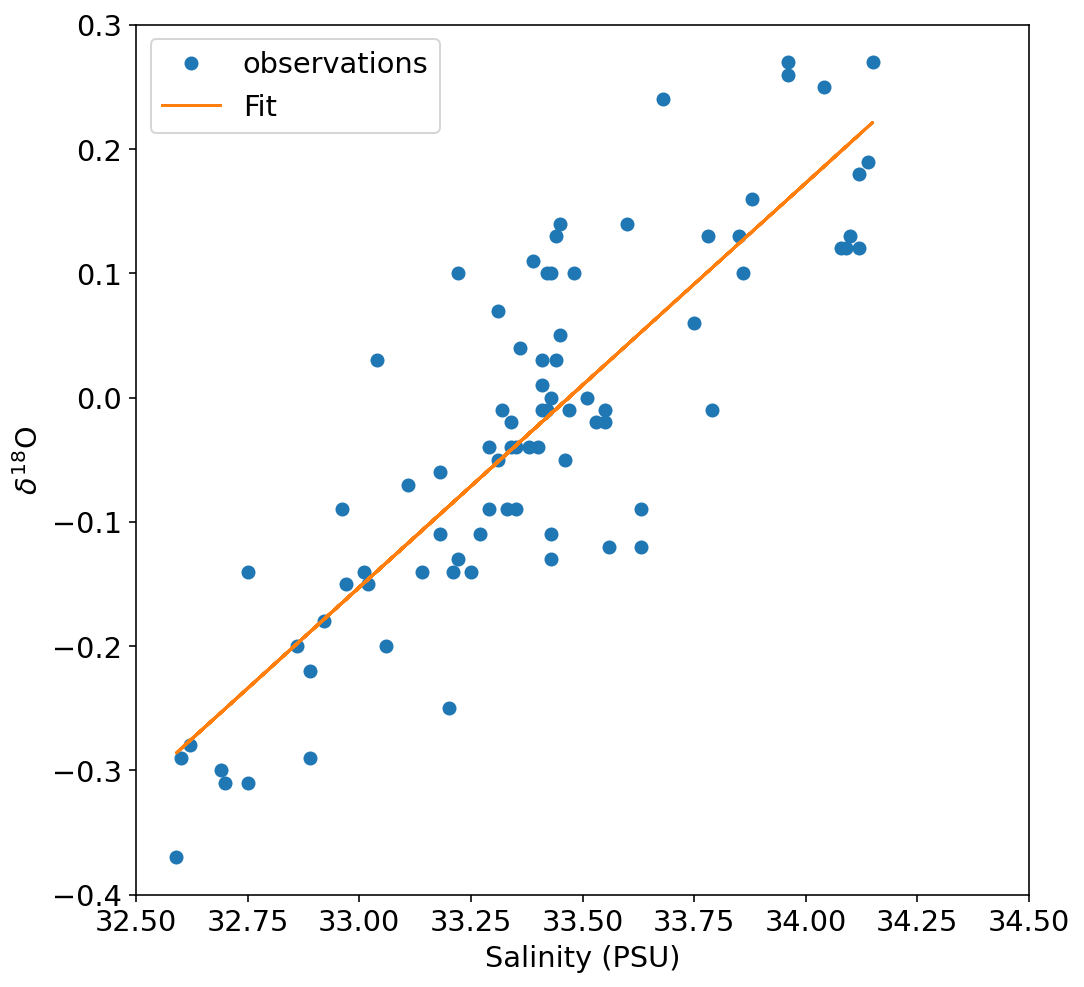

In [6]:
# import module
from sklearn.linear_model import LinearRegression

# define the x-variable (the predictor/regresso) and the y-variable. (the target/outcome)
# we'll call the values method of pandas to export the values into numpy arrays
x=df[['SSS']].values
y=df[['d18O']].values

# fit the data and obtain a prediction yhat
reg=LinearRegression().fit(x,y)
yhat=reg.predict(x);


# plot 
fig, ax = plt.subplots(1, 1,figsize=[8,8])
ax.plot(x,y,'o',label='observations')
ax.plot(x,yhat,'-',label='Fit')
ax.set_xlim(left=32.5,right=34.5)
ax.set_ylim(bottom=-0.4,top=0.3)
ax.set_xlabel('Salinity (PSU)');
ax.set_ylabel('$\delta^{18}$O');
ax.legend();

print('slope='+str(reg.coef_))
print('intercept='+str(reg.intercept_))


 Another way to look at the quality of the fit is to plot the data against the prediction, $y(x)$ vs $\hat y(x)=\hat \alpha + \hat \beta x$. For a single linear regression, the plot will actually look the same. But the place of the regression line is taken by a one-to-one line (y=x) 

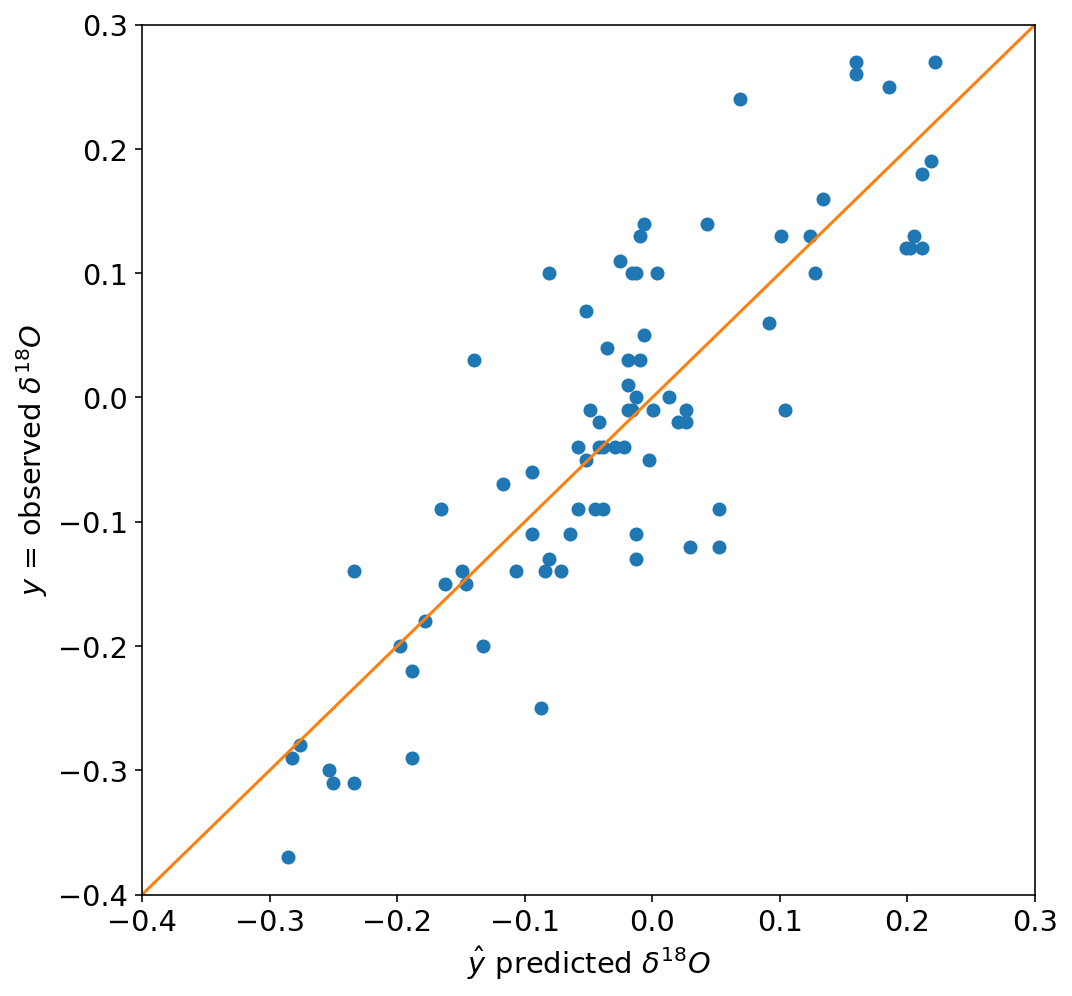

In [147]:
# plot 
fig, ax = plt.subplots(1, 1,figsize=[8,8])
ax.plot(yhat,y,'o')
ax.set_ylabel('$y$ = observed $\delta^{18}O$')
ax.set_xlabel('$\hat y$ predicted $\delta^{18}O$')
ax.set_xlim(left=-0.4,right=0.3)
ax.set_ylim(bottom=-0.4,top=0.3)
ax.plot([-0.4,0.3],[-0.4,0.3])

### Exercise: Do it by hand:
Remember from class (or <a href="https://en.wikipedia.org/wiki/Ordinary_least_squares"> Wikipedia </a>) that our best fit will be
    $$\hat y = \hat \alpha  +\hat \beta x$$

where
$$ \hat \beta = \frac{ \overline{ (x-\overline x)(y-\overline y)}}{\overline{  (x-\overline x)^2 }}$$

and 

$$\hat \alpha = \overline y - \hat \beta \overline x$$

Compute the $\hat \alpha, \hat \beta, \hat y$ using the formulas above and redo the plot. It should look the same as what you got using <code>sklearn</code>

In [8]:
# define the x-variable (the predictor/regresso) and the y-variable. (the target/outcome)
# we'll call the values method of pandas to export the values into numpy arrays
x=df[['SSS']].values
y=df[['d18O']].values

# fit the data and obtain a prediction yhat
betahat=?
alphahat=?
yhat=?


#plot


SyntaxError: invalid syntax (<ipython-input-8-2a7bac5865d4>, line 7)

# Multiple linear regression

Now what happens if we have more than one predictor, i.e. more than one feature that can affect the outcome?
Let's look at some more coral geochemistry data. This time we are looking at three factors that can influence the Mg/Ca ratio in corals: Seas surface temperature (SST), sea surface salinity (SSS), and pH.  The data comes from Gray and Evans (2019): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018PA003517

In [14]:
df=pd.read_csv('/data/keeling/a/cristi/SIMLES/data/mgca.csv')
df.head()


,SST,SSS,pH,MgCa
0,22.0,33.7,7.59,7.75
1,22.0,33.7,8.50,2.69
2,17.0,33.0,8.08,5.89
3,22.0,33.0,8.00,8.89
4,27.0,33.0,7.93,13.79


Text(0, 0.5, 'ln Mg/Ca')

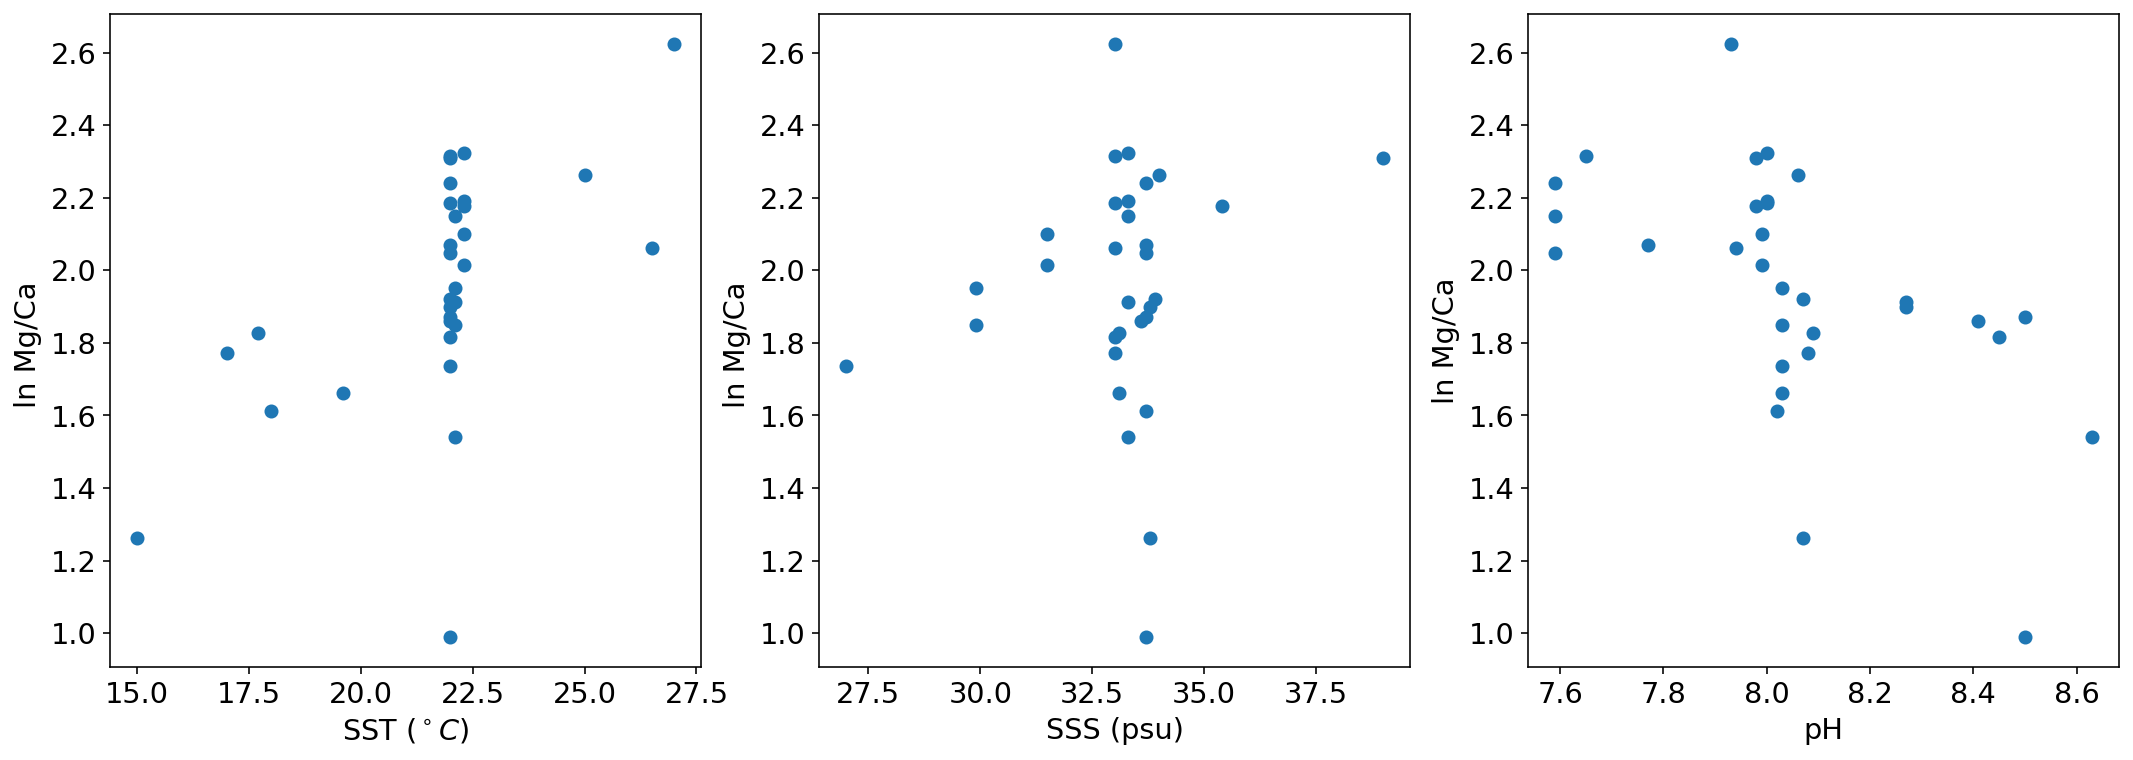

In [10]:
fig,ax=plt.subplots(1,3,figsize=[18,6])

ax[0].plot(df['SST'],np.log(df['MgCa']),'o')
ax[0].set_xlabel('SST ($^\circ C$)')
ax[0].set_ylabel('ln Mg/Ca ')

ax[1].plot(df['SSS'],np.log(df['MgCa']),'o')
ax[1].set_xlabel('SSS (psu)')
ax[1].set_ylabel('ln Mg/Ca ')

ax[2].plot(df['pH'],np.log(df['MgCa']),'o')
ax[2].set_xlabel('pH')
ax[2].set_ylabel('ln Mg/Ca')

We see that no single feature is able to predict the Mg/Ca ratio. But what if we consider all three at the same time? We'll consider a model:
$$\ln (\text{Mg/Ca}_n)=\beta_1 + \beta_2 \cdot SST_n + \beta_3 \cdot SSS_n + \beta_4 \cdot pH_n + \varepsilon_n,$$
where n is the number of the measurement. 

In general, we can write this as:
$$ y_n= \beta_1 x_{1,n} + \beta_2 x_{2,n} + \beta_3 x_{3,n}+ \beta_4 x_{4,n},$$
where, in order to get an intercept we just take the first predictor to be a constant, $x_{1,n}=1$. 

Not that in matrix notation, this becomes:

$$ \mathbf{y} =\mathbf{X}\mathbf{\beta}+\mathbf{\varepsilon}$$

$$
\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{array}\right]=
\left[\begin{array}{cccc}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4}\\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4}\\
\vdots & \vdots & \vdots & \vdots\\
x_{n,1} & x_{n,2} & x_{n,3} & x_{n.4}
\end{array}\right]
\left[\begin{array}{c}
\beta_{1}\\
\beta_{2}\\
\beta_{3}\\
\beta_{4}
\end{array}\right]+\left[\begin{array}{c}
\varepsilon_{1}\\
\varepsilon_{2}\\
\vdots\\
\varepsilon_{n}
\end{array}\right]
$$

In this case, the best estimate of $\beta$ is
$$\hat \beta = \left(X^{T}X\right)^{-1}X^{T}y$$

You can find a proof on <a href="https://en.wikipedia.org/wiki/Ordinary_least_squares"> Wikipedia </a>). But to get some intuition you can consider the case of a single predictor:
$$y_n=\beta x_n + \varepsilon_n,$$
where we have shown that the least squares estimator is
$$\hat \beta=\frac{\overline{xy}}{\overline {x^2}}= \frac{\sum_n x_n y_n}{\sum_n x_n x_n}$$
If we write $x$ and $y$ in vector notation, than $\sum_n x_ny_n$ is just the vector dot product $\mathbf{x}^t\mathbf{y}$.
So, we can write 
$$\hat \beta=\frac{\mathbf{x}^t\mathbf{y}}{\mathbf{x}^t\mathbf{x}}=({\mathbf{x}^t\mathbf{x}})^{-1}\mathbf{x}^t\mathbf{y}$$



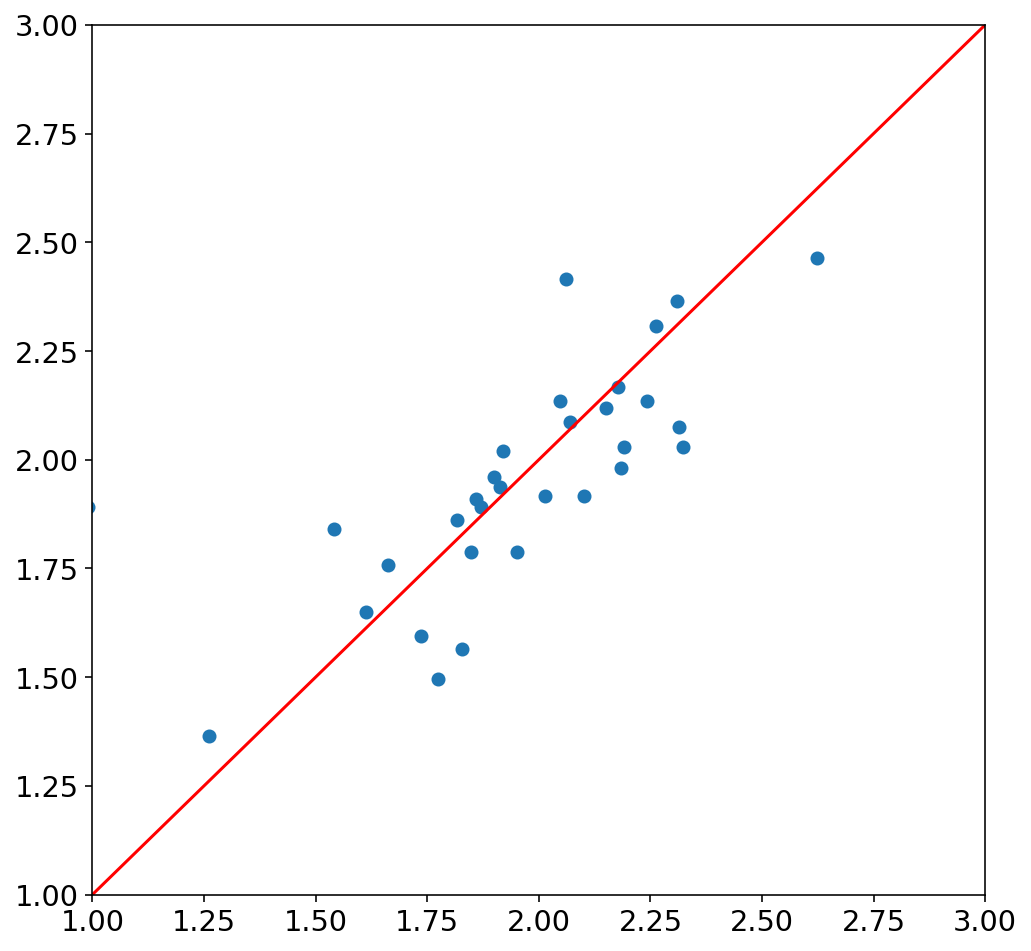

In [11]:
y=np.log(df['MgCa'].values)
X=df[['SST','SSS','pH']].values


betahat=np.matmul( np.linalg.inv(np.matmul(np.transpose(X),X)), np.matmul(np.transpose(X),y))
yhat=np.matmul(X,betahat)

plt.rcParams['figure.figsize'] = 8,8
fig, ax = plt.subplots(1, 1)
ax.plot(y,yhat,'o')
ax.set_xlim(left=1,right=3)
ax.set_ylim(bottom=1,top=3)
ax.plot([1,3],[1,3],'r-')

### Exercise: use sklearn 
Use sklearn (just like above), and convince yourself that you get the same results :) 

In [12]:
y=np.log(df['MgCa'].values)
X=df[['SST','SSS','pH']].values

from sklearn.linear_model import LinearRegression
reg=?
yhat=?

# plot

SyntaxError: invalid syntax (<ipython-input-12-2caed543afe9>, line 5)